In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
import numpy as np

# big_data_set2_f.csv
 - 신한카드 요식업종 서울 성동구 지역 영세/중소 가맹점
 - 기간 : 2023년 01월 ~ 2024년 12월
 - 데이터 총 건수 86,590건

## Step 1. 데이터 불러오기 및 기본 정보 확인

In [3]:
set2 = pd.read_csv('../data/big_data_set2_f.csv', encoding = 'cp949')
set2.head()

,ENCODED_MCT,TA_YM,MCT_OPE_MS_CN,RC_M1_SAA,RC_M1_TO_UE_CT,RC_M1_UE_CUS_CN,RC_M1_AV_NP_AT,APV_CE_RAT,DLV_SAA_RAT,M1_SME_RY_SAA_RAT,M1_SME_RY_CNT_RAT,M12_SME_RY_SAA_PCE_RT,M12_SME_BZN_SAA_PCE_RT,M12_SME_RY_ME_MCT_RAT,M12_SME_BZN_ME_MCT_RAT
0,000F03E44A,202404,4_50-75%,5_75-90%,5_75-90%,5_75-90%,5_75-90%,1_상위1구간,-999999.9,2.6,10.6,93.8,71.5,16.7,7.8
1,000F03E44A,202312,4_50-75%,6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),NaN,-999999.9,0.0,0.0,94.8,73.4,16.6,7.2
2,002816BA73,202404,2_10-25%,3_25-50%,4_50-75%,4_50-75%,2_10-25%,6_상위6구간(하위1구간),-999999.9,96.6,40.8,15.6,20.0,17.5,5.2
3,002816BA73,202411,2_10-25%,3_25-50%,4_50-75%,4_50-75%,2_10-25%,6_상위6구간(하위1구간),-999999.9,108.0,46.4,16.8,19.8,16.9,6.9
4,002816BA73,202406,2_10-25%,4_50-75%,4_50-75%,4_50-75%,2_10-25%,1_상위1구간,-999999.9,74.2,38.1,16.0,19.9,17.3,5.6


In [4]:
set2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86590 entries, 0 to 86589
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ENCODED_MCT             86590 non-null  object 
 1   TA_YM                   86590 non-null  int64  
 2   MCT_OPE_MS_CN           86590 non-null  object 
 3   RC_M1_SAA               86590 non-null  object 
 4   RC_M1_TO_UE_CT          86590 non-null  object 
 5   RC_M1_UE_CUS_CN         86590 non-null  object 
 6   RC_M1_AV_NP_AT          86590 non-null  object 
 7   APV_CE_RAT              79958 non-null  object 
 8   DLV_SAA_RAT             86590 non-null  float64
 9   M1_SME_RY_SAA_RAT       86590 non-null  float64
 10  M1_SME_RY_CNT_RAT       86590 non-null  float64
 11  M12_SME_RY_SAA_PCE_RT   86590 non-null  float64
 12  M12_SME_BZN_SAA_PCE_RT  86590 non-null  float64
 13  M12_SME_RY_ME_MCT_RAT   86590 non-null  float64
 14  M12_SME_BZN_ME_MCT_RAT  86590 non-null

In [5]:
set2.describe()

,TA_YM,DLV_SAA_RAT,M1_SME_RY_SAA_RAT,M1_SME_RY_CNT_RAT,M12_SME_RY_SAA_PCE_RT,M12_SME_BZN_SAA_PCE_RT,M12_SME_RY_ME_MCT_RAT,M12_SME_BZN_ME_MCT_RAT
count,86590.000000,86590.000000,86590.000000,86590.000000,86590.000000,86590.000000,86590.000000,86590.000000
mean,202360.704850,-662249.470344,134.503306,152.312380,31.184643,24.070313,16.187137,-247354.685375
std,49.948354,472955.612921,167.981671,227.070665,25.253279,22.843491,3.876532,431484.515919
min,202301.000000,-999999.900000,-70.000000,0.000000,0.100000,0.000000,0.000000,-999999.900000
25%,202307.000000,-999999.900000,25.200000,22.100000,9.900000,1.300000,14.100000,4.200000
50%,202401.000000,-999999.900000,82.500000,81.700000,23.900000,18.900000,17.000000,8.000000
75%,202407.000000,3.400000,181.700000,199.600000,48.200000,39.200000,18.700000,9.000000
max,202412.000000,111.200000,4300.900000,7059.800000,100.000000,99.600000,59.100000,13.900000


In [6]:
set2.isna().sum()

ENCODED_MCT                  0
TA_YM                        0
MCT_OPE_MS_CN                0
RC_M1_SAA                    0
RC_M1_TO_UE_CT               0
RC_M1_UE_CUS_CN              0
RC_M1_AV_NP_AT               0
APV_CE_RAT                6632
DLV_SAA_RAT                  0
M1_SME_RY_SAA_RAT            0
M1_SME_RY_CNT_RAT            0
M12_SME_RY_SAA_PCE_RT        0
M12_SME_BZN_SAA_PCE_RT       0
M12_SME_RY_ME_MCT_RAT        0
M12_SME_BZN_ME_MCT_RAT       0
dtype: int64

## Step 2. 데이터 정제 및 변수별 내용 확인

### 1) 데이터 정제 및 타입 변환

In [7]:
# 1. 새로운 열 이름 딕셔너리 정의 (기존이름: 새이름)
new_column_names = {
    'ENCODED_MCT': '가맹점ID',
    'TA_YM': '기준년월',
    'MCT_OPE_MS_CN': '영업개월수_구간정보',
    'RC_M1_SAA': '최근1개월_이용금액_구간정보',
    'RC_M1_TO_UE_CT': '최근1개월_총이용건수_구간정보',
    'RC_M1_UE_CUS_CN': '최근1개월_이용고객수_구간정보',
    'RC_M1_AV_NP_AT': '최근1개월_평균결제금액_구간정보',
    'APV_CE_RAT': '승인취소비율_구간정보',
    'DLV_SAA_RAT': '배달이용금액_비율',
    'M1_SME_RY_SAA_RAT': '1개월_동종업종_매출비율',
    'M1_SME_RY_CNT_RAT': '1개월_동종업종_건수비율',
    'M12_SME_RY_SAA_PCE_RT': '12개월_동종업종_매출순위',
    'M12_SME_BZN_SAA_PCE_RT': '12개월_동일상권_매출순위',
    'M12_SME_RY_ME_MCT_RAT': '12개월_동종업종_경쟁강도',
    'M12_SME_BZN_ME_MCT_RAT': '12개월_동일상권_경쟁강도'
}

# 2. 열 이름 변경 적용
set2.rename(columns=new_column_names, inplace=True)

# 3. 변경된 열 이름 확인
print("✅ 한글로 변경된 열 이름 확인:")
print(set2.columns.tolist())

print("\n✅ 변경된 데이터프레임 미리보기:")
set2.head()

✅ 한글로 변경된 열 이름 확인:
['가맹점ID', '기준년월', '영업개월수_구간정보', '최근1개월_이용금액_구간정보', '최근1개월_총이용건수_구간정보', '최근1개월_이용고객수_구간정보', '최근1개월_평균결제금액_구간정보', '승인취소비율_구간정보', '배달이용금액_비율', '1개월_동종업종_매출비율', '1개월_동종업종_건수비율', '12개월_동종업종_매출순위', '12개월_동일상권_매출순위', '12개월_동종업종_경쟁강도', '12개월_동일상권_경쟁강도']

✅ 변경된 데이터프레임 미리보기:


,가맹점ID,기준년월,영업개월수_구간정보,최근1개월_이용금액_구간정보,최근1개월_총이용건수_구간정보,최근1개월_이용고객수_구간정보,최근1개월_평균결제금액_구간정보,승인취소비율_구간정보,배달이용금액_비율,1개월_동종업종_매출비율,1개월_동종업종_건수비율,12개월_동종업종_매출순위,12개월_동일상권_매출순위,12개월_동종업종_경쟁강도,12개월_동일상권_경쟁강도
0,000F03E44A,202404,4_50-75%,5_75-90%,5_75-90%,5_75-90%,5_75-90%,1_상위1구간,-999999.9,2.6,10.6,93.8,71.5,16.7,7.8
1,000F03E44A,202312,4_50-75%,6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),NaN,-999999.9,0.0,0.0,94.8,73.4,16.6,7.2
2,002816BA73,202404,2_10-25%,3_25-50%,4_50-75%,4_50-75%,2_10-25%,6_상위6구간(하위1구간),-999999.9,96.6,40.8,15.6,20.0,17.5,5.2
3,002816BA73,202411,2_10-25%,3_25-50%,4_50-75%,4_50-75%,2_10-25%,6_상위6구간(하위1구간),-999999.9,108.0,46.4,16.8,19.8,16.9,6.9
4,002816BA73,202406,2_10-25%,4_50-75%,4_50-75%,4_50-75%,2_10-25%,1_상위1구간,-999999.9,74.2,38.1,16.0,19.9,17.3,5.6


In [8]:
# 1. 데이터 내에 -999999.9를 결측치로 변환
set2.replace(-999999.9, np.nan, inplace=True)

print("결측치 변환 후 데이터 확인:")
print(set2.isnull().sum())

결측치 변환 후 데이터 확인:
가맹점ID                    0
기준년월                     0
영업개월수_구간정보               0
최근1개월_이용금액_구간정보          0
최근1개월_총이용건수_구간정보         0
최근1개월_이용고객수_구간정보         0
최근1개월_평균결제금액_구간정보        0
승인취소비율_구간정보           6632
배달이용금액_비율            57345
1개월_동종업종_매출비율            0
1개월_동종업종_건수비율            0
12개월_동종업종_매출순위           0
12개월_동일상권_매출순위           0
12개월_동종업종_경쟁강도           0
12개월_동일상권_경쟁강도       21419
dtype: int64


In [9]:
# 2. TA_YM을 날짜(datetime) 타입으로 변환
set2['기준년월'] = pd.to_datetime(set2['기준년월'], format='%Y%m')

print(set2[['기준년월']].head())

        기준년월
0 2024-04-01
1 2023-12-01
2 2024-04-01
3 2024-11-01
4 2024-06-01


In [10]:
# 3. 분석할 주요 범주형 변수들의 순위와 구간을 분리
categorical_cols = ['영업개월수_구간정보', '최근1개월_이용금액_구간정보', '최근1개월_총이용건수_구간정보', '최근1개월_이용고객수_구간정보',
                     '최근1개월_평균결제금액_구간정보', '승인취소비율_구간정보']

for col in categorical_cols:
    # str accessor가 문자열이 아닌 데이터(결측치 등)에서 오류를 일으키지 않도록 처리
    set2[col] = set2[col].astype(str)
    
    # '_'를 기준으로 분리하여 새로운 컬럼 생성
    split_data = set2[col].str.split('_', expand=True)
    set2[f'{col}_NUM'] = split_data[0]
    set2[f'{col}_CAT'] = split_data[1]

print("\n분리된 컬럼 확인:")
set2[['영업개월수_구간정보_NUM', '영업개월수_구간정보_CAT']].head()


분리된 컬럼 확인:


,영업개월수_구간정보_NUM,영업개월수_구간정보_CAT
0,4,50-75%
1,4,50-75%
2,2,10-25%
3,2,10-25%
4,2,10-25%


### 2) 변수별 내용 확인 (시각화 분석)

In [13]:
# 범주형 변수 분리
categorical_cols_original = [
    '영업개월수_구간정보', '최근1개월_이용금액_구간정보', '최근1개월_총이용건수_구간정보',
    '최근1개월_이용고객수_구간정보', '최근1개월_평균결제금액_구간정보', '승인취소비율_구간정보'
]
for col in categorical_cols_original:
    set2[col] = set2[col].astype(str)
    split_data = set2[col].str.split('_', expand=True)
    # df[f'{col}_순위'] = split_data[0] # 순위 정보는 이번 시각화에선 제외
    set2[f'{col}_범주'] = split_data[1]

# 시각화할 열 목록 정의
numerical_cols = ['배달이용금액_비율', '1개월_동종업종_매출비율', '1개월_동종업종_건수비율',
                  '12개월_동종업종_매출순위', '12개월_동일상권_매출순위',
                  '12개월_동종업종_경쟁강도', '12개월_동일상권_경쟁강도']
categorical_cols = [col + '_범주' for col in categorical_cols_original]



--- 수치형 데이터 분포 시각화 ---


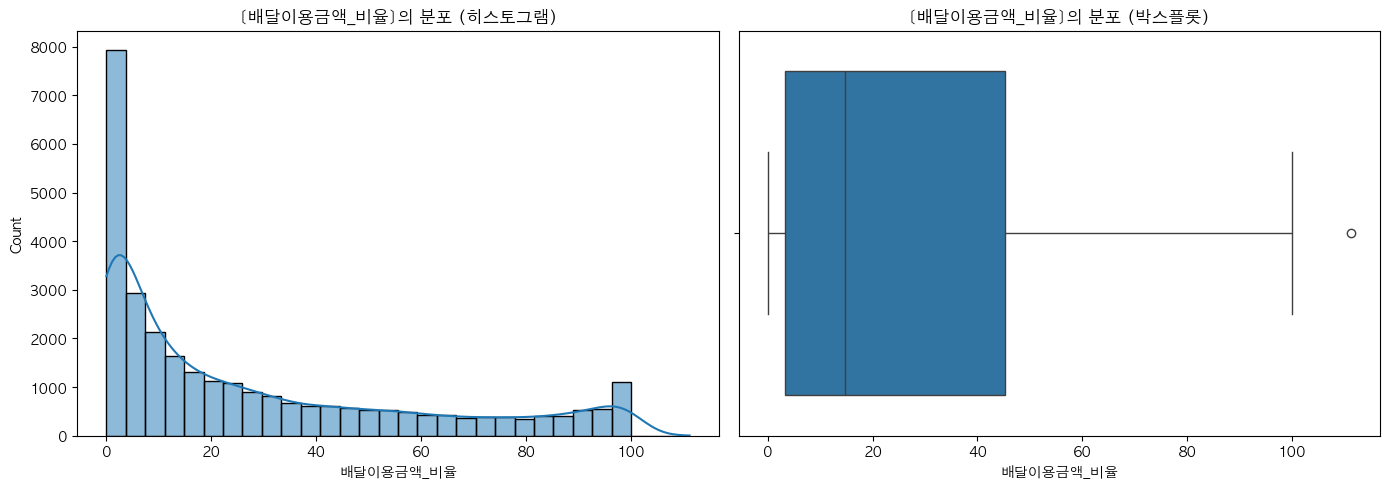

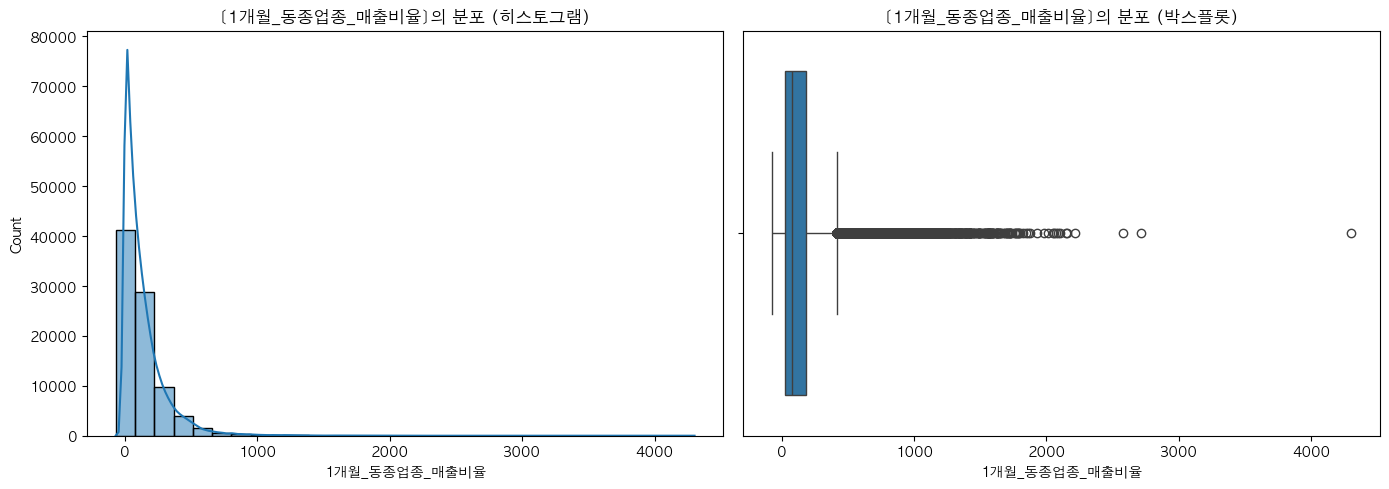

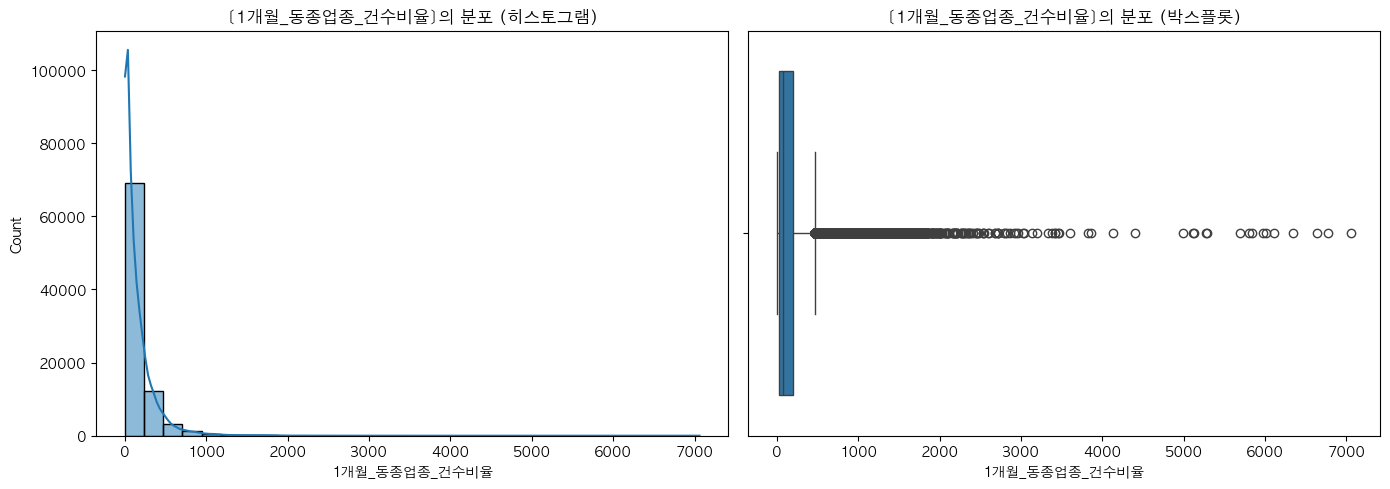

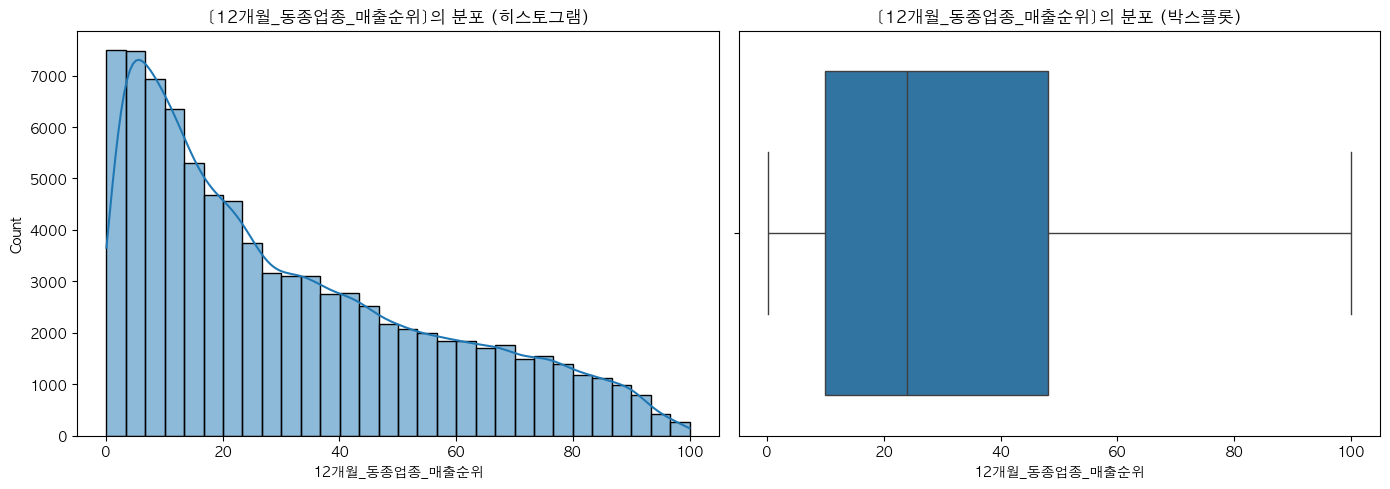

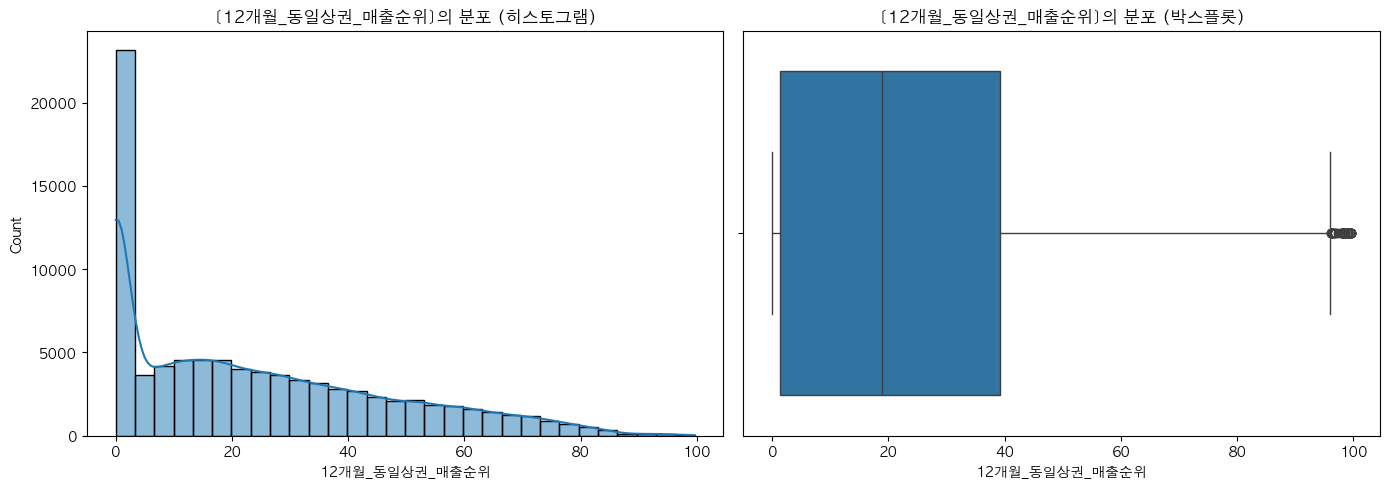

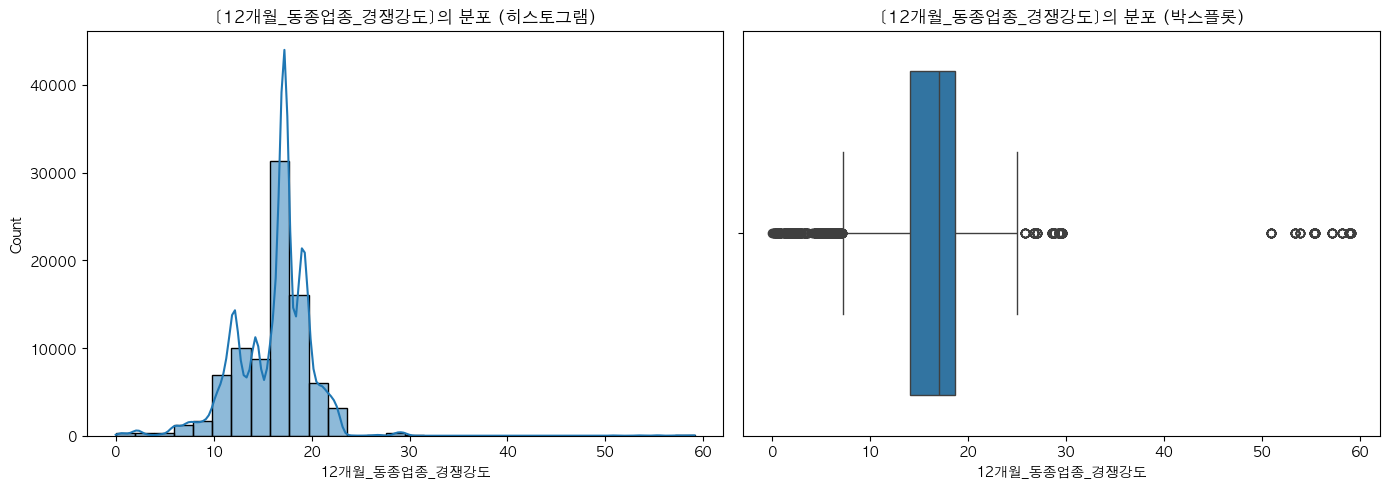

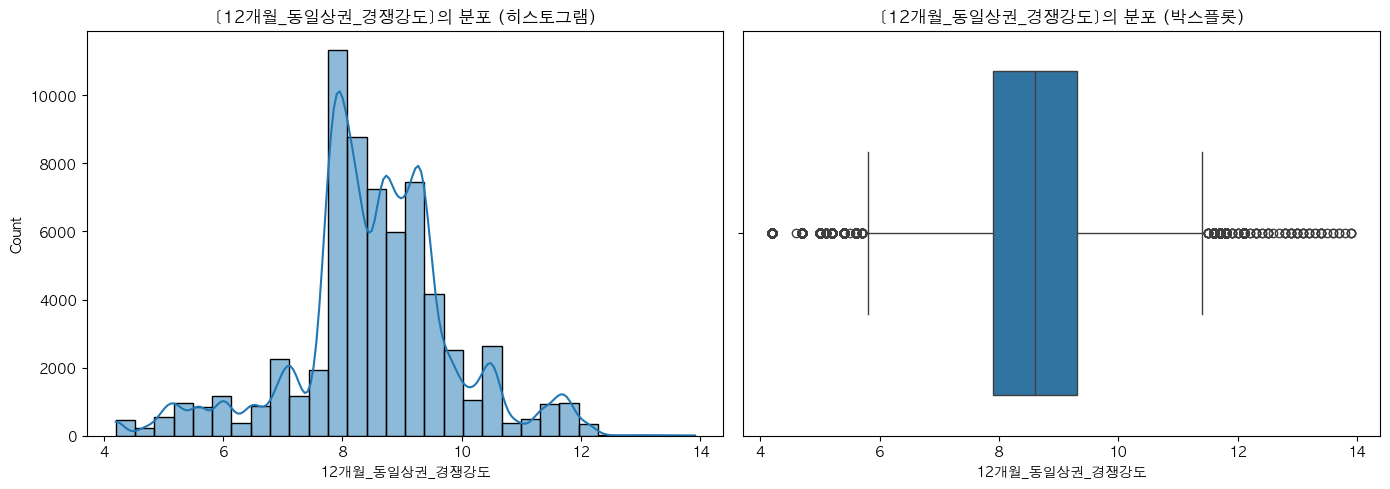

In [14]:

# (1) 수치형 데이터 시각화
print("\n--- 수치형 데이터 분포 시각화 ---")
for col in numerical_cols:
    plt.figure(figsize=(14, 5))
    
    # 히스토그램
    plt.subplot(1, 2, 1)
    sns.histplot(set2[col], kde=True, bins=30)
    plt.title(f'[{col}]의 분포 (히스토그램)')
    
    # 박스플롯
    plt.subplot(1, 2, 2)
    sns.boxplot(x=set2[col])
    plt.title(f'[{col}]의 분포 (박스플롯)')
    
    plt.tight_layout()
    plt.show()


**[수치형 데이터 시각화 결과 해석]**
1. 대부분의 값들이 특정 구간에 몰려있는 '치우친 분포'
- `배달이용금액_비율`, `1개월_동종업종_매출비율`, `12개월_동일상권_경쟁강도` 등 대부분의 그래프가 왼쪽으로 심하게 치우쳐 있음.

- (배달) 대부분의 가맹점은 배달을 안 하거나 비중이 매우 낮음. 하지만 박스플롯의 수많은 점(이상치)들은 소수의 가게가 배달에 크게 의존하고 있음을 보여줌. *즉, 가맹점들의 배달 전략이 극단적으로 나뉘어 있음.*

- (경쟁강도) 대부분의 가맹점은 평균적인 수준의 경쟁 환경에 있지만, 일부는 매우 치열한 상권에서 영업하고 있음.

2. 전체적으로 고르게 퍼져있는 '균일한 분포'

- `12개월_동종업종_매출순위`와 `12개월_동일상권_매출순위` 그래프는 다른 것들과 달리 분포가 비교적 균일. 데이터가 특정 그룹에 편중되지 않아서, 위기 가맹점과 우수 가맹점의 특징을 비교 분석하기에 용이함.

-> 경쟁이 심하면 순위가 낮아지는지? ('상권 내 경쟁 강도'가 높을수록 '상권 내 매출 순위'가 정말로 낮아지는지)

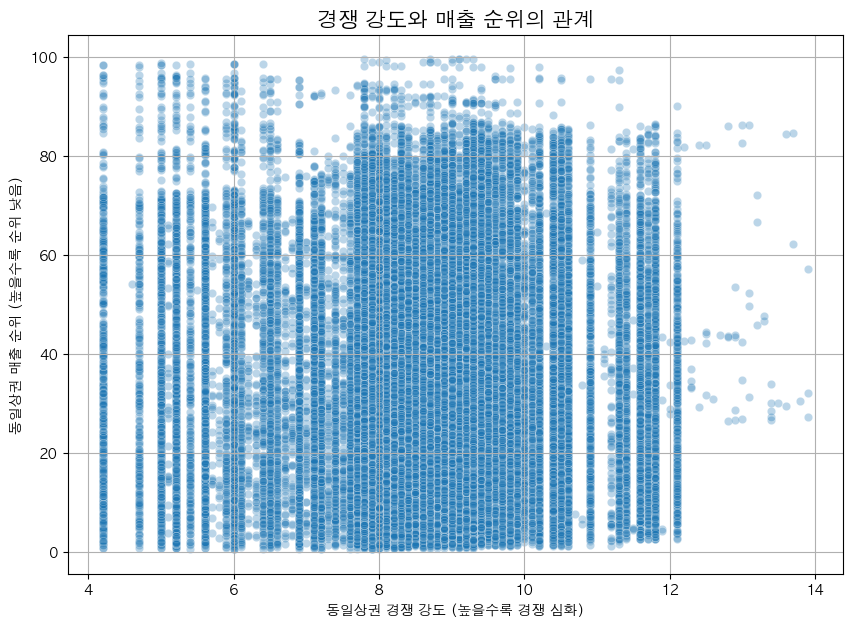

In [18]:
# (이전 코드는 모두 실행되었다고 가정)

plt.figure(figsize=(10, 7))
sns.scatterplot(data=set2, x='12개월_동일상권_경쟁강도', y='12개월_동일상권_매출순위', alpha=0.3)
plt.title('경쟁 강도와 매출 순위의 관계', fontsize=15)
plt.xlabel('동일상권 경쟁 강도 (높을수록 경쟁 심화)')
plt.ylabel('동일상권 매출 순위 (높을수록 순위 낮음)')
plt.grid(True)
plt.show()

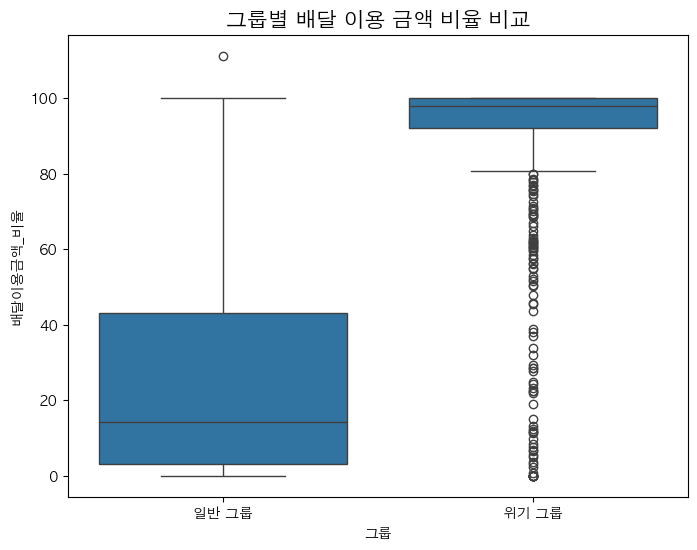

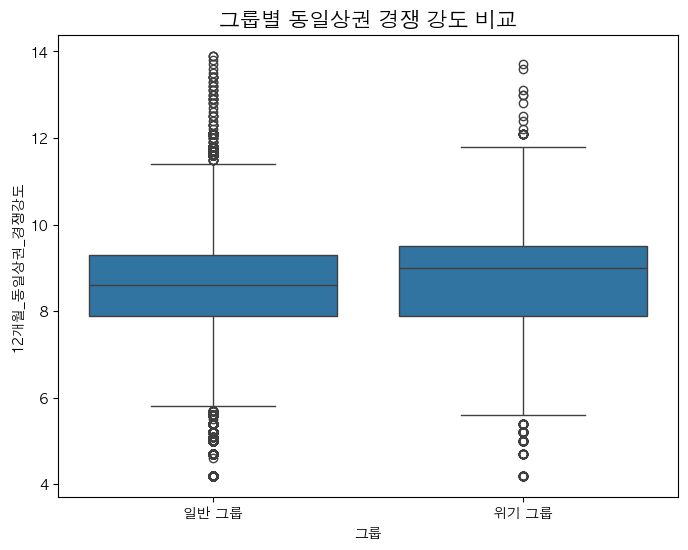

In [19]:
# '위기 그룹' 정의 (매출 순위 75 이상)
set2['그룹'] = np.where(set2['12개월_동일상권_매출순위'] >= 75, '위기 그룹', '일반 그룹')

# 배달 비율을 그룹별로 비교
plt.figure(figsize=(8, 6))
sns.boxplot(data=set2, x='그룹', y='배달이용금액_비율')
plt.title('그룹별 배달 이용 금액 비율 비교', fontsize=15)
plt.show()

# 경쟁 강도를 그룹별로 비교
plt.figure(figsize=(8, 6))
sns.boxplot(data=set2, x='그룹', y='12개월_동일상권_경쟁강도')
plt.title('그룹별 동일상권 경쟁 강도 비교', fontsize=15)
plt.show()


--- 범주형 데이터 분포 시각화 ---


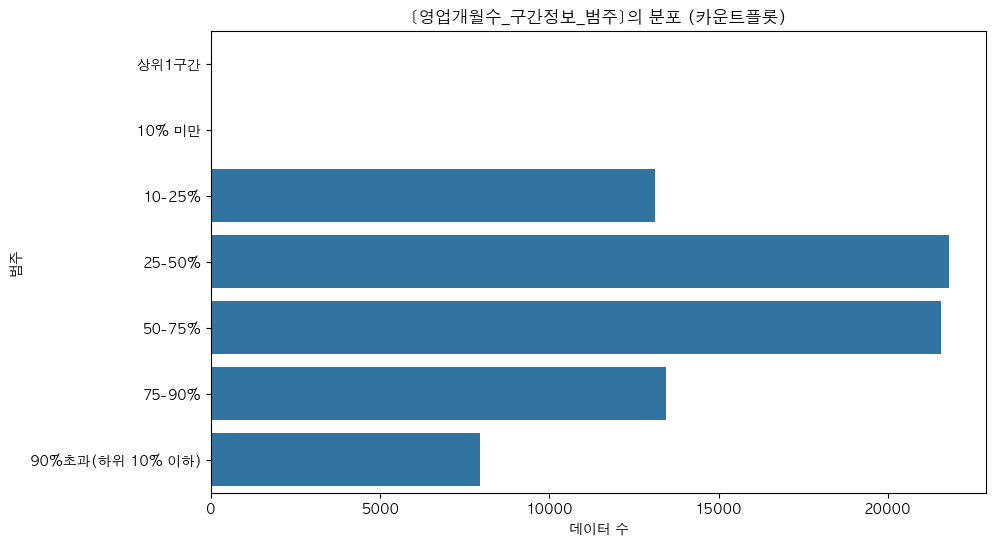

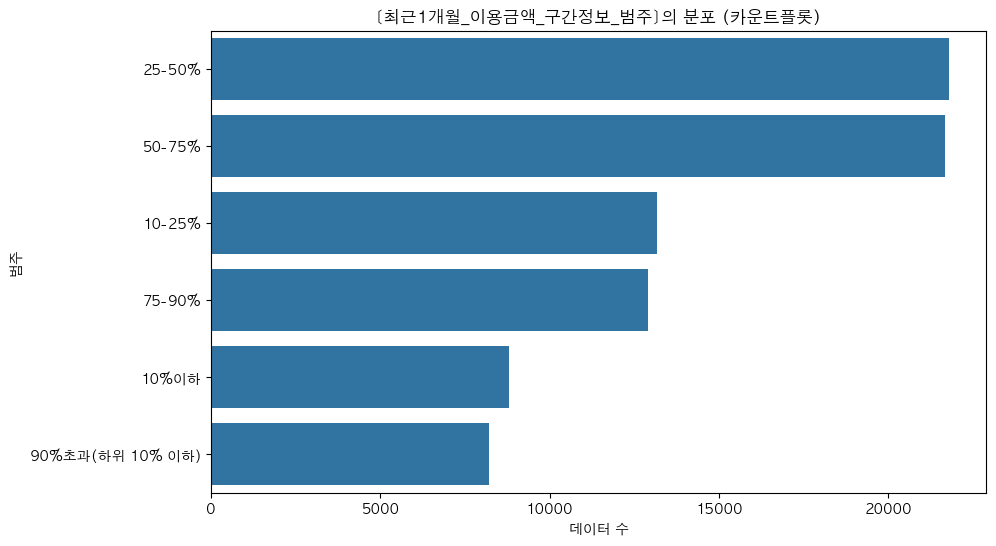

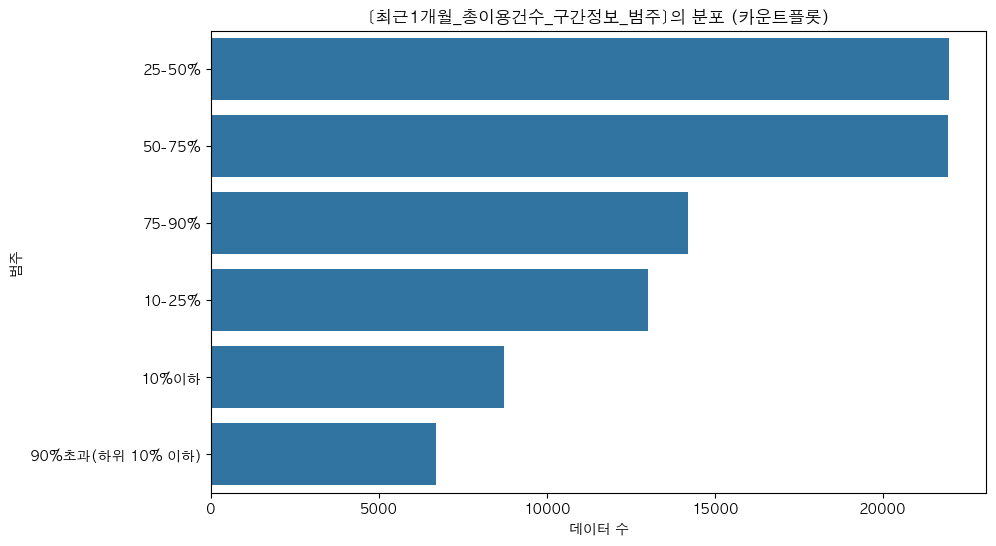

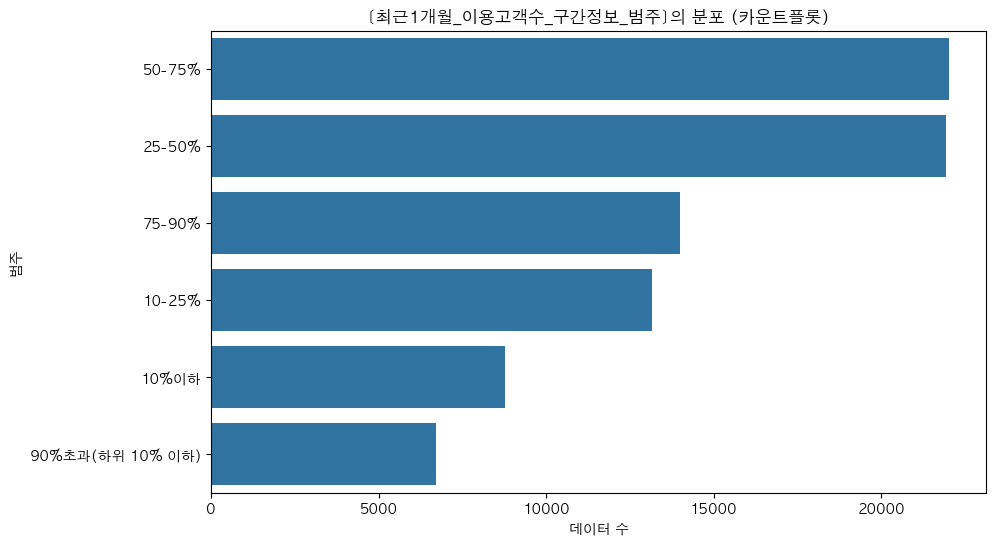

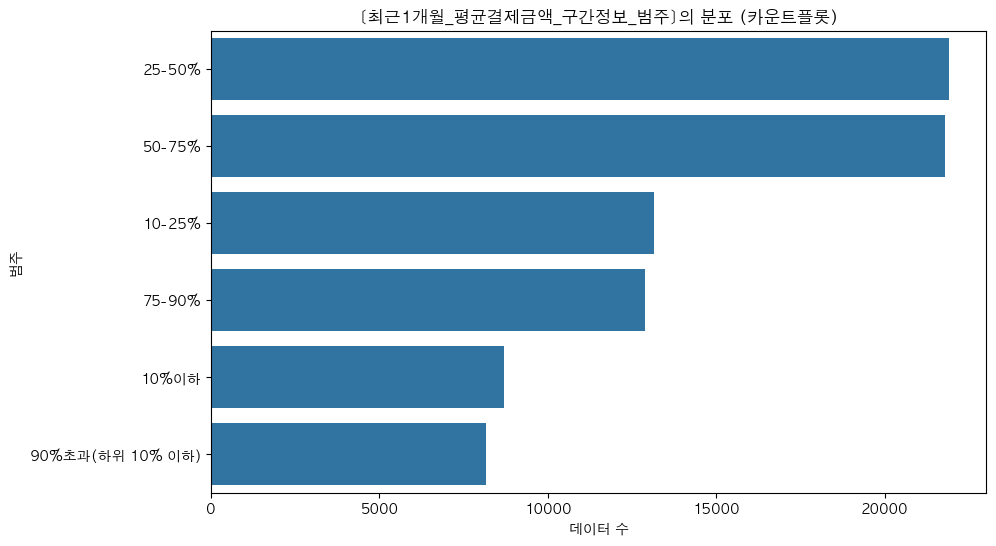

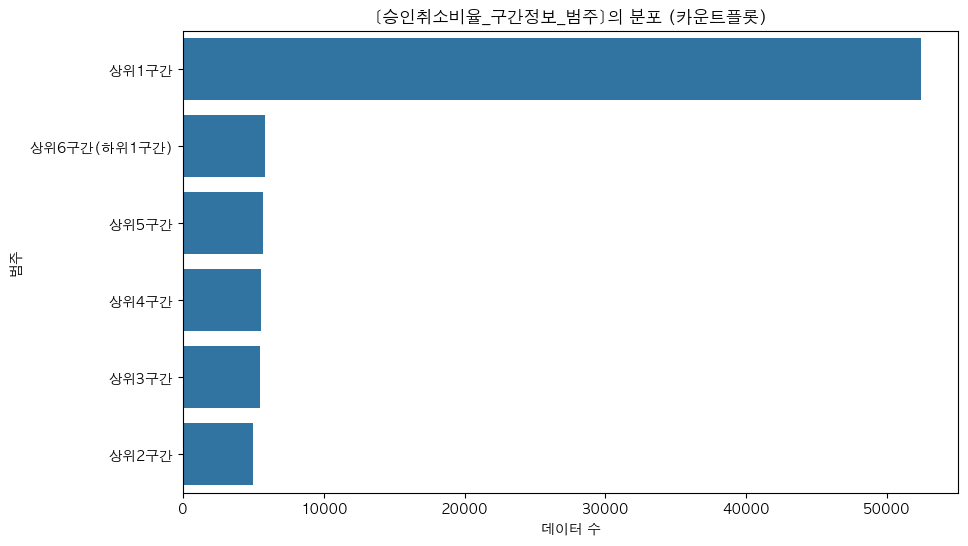

In [17]:
# (2) 범주형 데이터 시각화
print("\n--- 범주형 데이터 분포 시각화 ---")
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    
    # 카테고리 순서가 의미 있는 경우 정렬
    if '영업개월수' in col:
        order = ['상위1구간', '10% 미만', '10-25%', '25-50%', '50-75%', '75-90%', '90%초과(하위 10% 이하)']
        sns.countplot(y=col, data=set2, order=order)
    else:
        sns.countplot(y=col, data=set2, order=set2[col].value_counts().index)

    plt.title(f'[{col}]의 분포 (카운트플롯)')
    plt.xlabel('데이터 수')
    plt.ylabel('범주')
    plt.show()


**[범주형 데이터 시각화 결과 해석]**
1. 신생 가맹점의 비중이 높음
- `영업개월수_구간정보_범주` 그래프를 보면, '90%초과(하위 10% 이하)', 즉 영업을 시작한 지 얼마 안 된 가맹점들의 수가 가장 많은 그룹 중 하나인 것을 알 수 있음.

- 인사이트: 이 데이터는 신생 가맹점들의 초기 생존과 성장 과정을 분석하는 데 매우 중요하게 사용될 수 있음. 신규 업체들이 겪는 위기는 기존 업체와는 다른 양상일 수 있음.

2. '객단가'가 낮은 업종이 다수 포함
- `최근1개월_이용금액`이나 `이용고객수`의 분포는 비교적 균일했던 반면, `최근1개월_평균결제금액_구간정보_범주` 그래프는 하위 구간('50-75%', '75-90%' 등)에 데이터가 몰려 있음.

- 인사이트: 이는 데이터셋에 포함된 가맹점들이 객단가가 높은 고급 식당보다는, 객단가가 낮은 카페, 분식, 패스트푸드점 등일 가능성이 높다는 것을 시사. 업종의 특성을 고려하여 위기 신호를 해석.

3. '승인취소비율'은 강력한 이상 신호
- `승인취소비율_구간정보_범주` 그래프는 거의 모든 데이터가 '상위1구간'(가장 낮은 취소 비율)에 압도적으로 몰려 있음.

- 인사이트: 대부분의 가게는 결제 취소가 거의 없다는 의미. 따라서, 만약 **어떤 가게의 승인취소비율이 이례적으로 높다면, 이는 고객 불만이나 운영상의 심각한 문제를 나타내는 매우 강력한 '위기 신호'** 일 수 있음.


--- 시계열 데이터 분포 시각화 ---


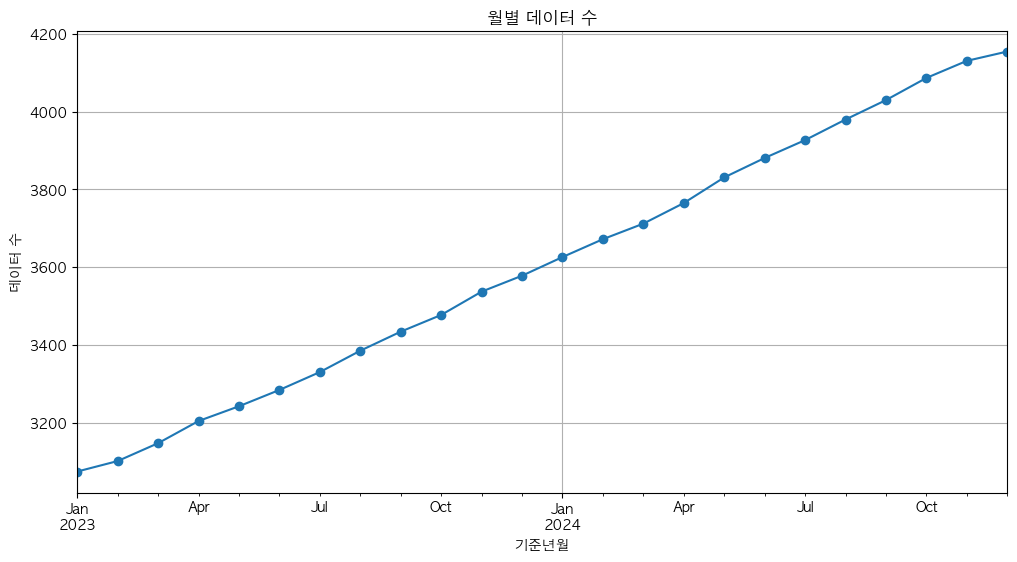

In [16]:

# (3) 시계열 데이터 시각화
print("\n--- 시계열 데이터 분포 시각화 ---")
plt.figure(figsize=(12, 6))
set2.groupby('기준년월').size().plot(kind='line', marker='o')
plt.title('월별 데이터 수')
plt.ylabel('데이터 수')
plt.grid(True)
plt.show()

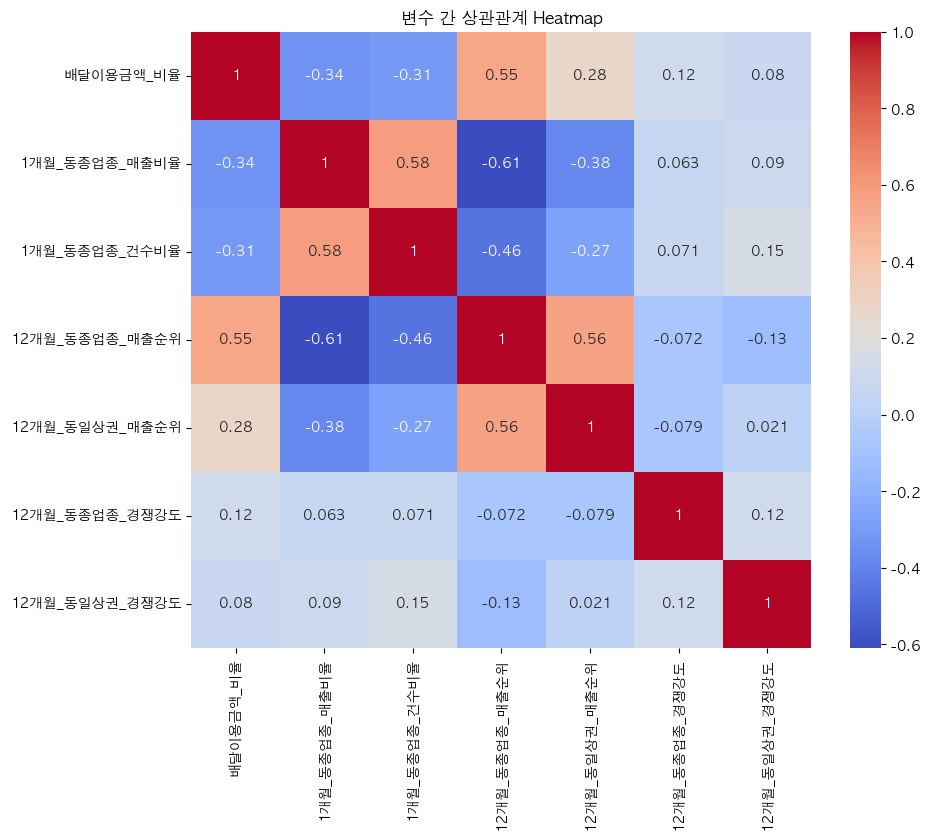

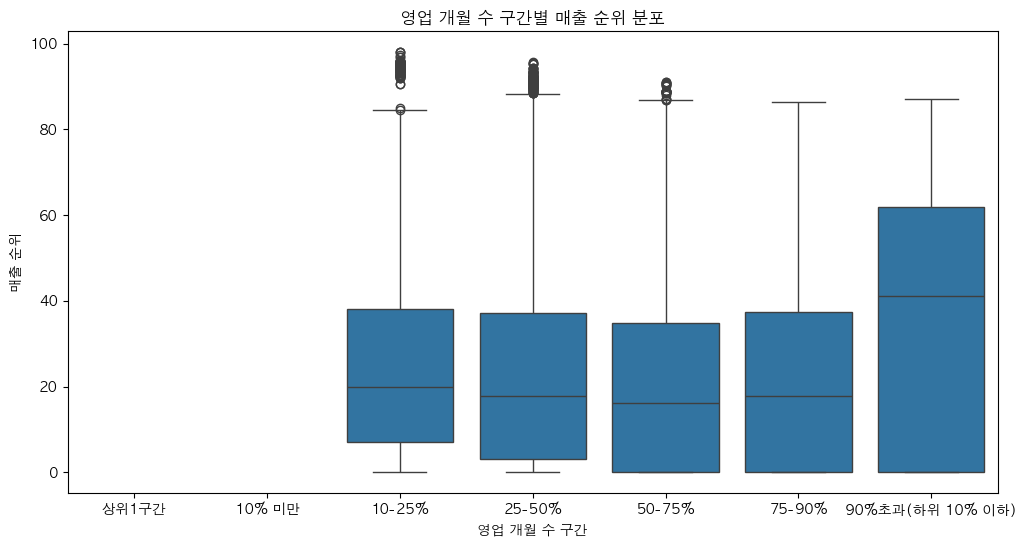

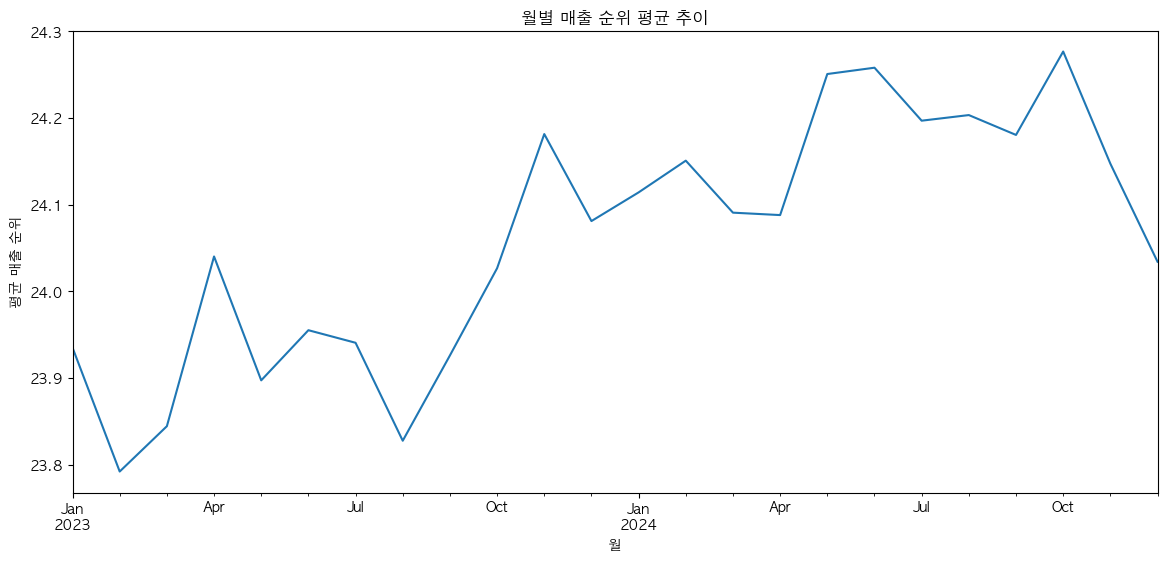

In [ ]:
# 변수 간 상관관계 heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(set2.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('변수 간 상관관계 Heatmap')
plt.show()

# 범주형 변수별 수치형 변수 분포 (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='영업개월수_구간정보_CAT', y='12개월_동일상권_매출순위', data=set2, order=order)
plt.title('영업 개월 수 구간별 매출 순위 분포')
plt.xlabel('영업 개월 수 구간')
plt.ylabel('매출 순위')
plt.show()

# 시계열 분석: 월별 매출 순위 평균 추이
monthly_trend = set2.groupby('기준년월')['12개월_동일상권_매출순위'].mean()
plt.figure(figsize=(14, 6))
monthly_trend.plot()
plt.title('월별 매출 순위 평균 추이')
plt.xlabel('월')
plt.ylabel('평균 매출 순위')
plt.show()

### 3) 가맹점의 순위 변화 그래프

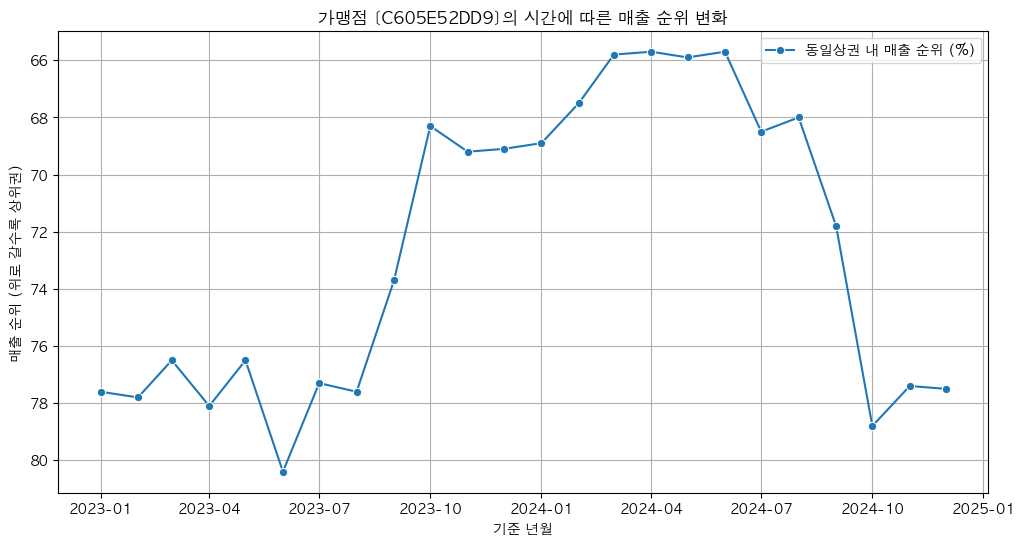

In [23]:
# 분석할 가맹점 ID 하나를 임의로 선택
sample_mct_id = set2['가맹점ID'].value_counts().index[4]

# 해당 가맹점 데이터만 필터링
sample_df = set2[set2['가맹점ID'] == sample_mct_id].sort_values(by='기준년월')

# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(x='기준년월', y='12개월_동일상권_매출순위', data=sample_df, marker='o', label='동일상권 내 매출 순위 (%)')

# y축을 뒤집어서 낮은 값(상위권)이 위로 오도록 설정
plt.gca().invert_yaxis()

plt.title(f'가맹점 [{sample_mct_id}]의 시간에 따른 매출 순위 변화')
plt.xlabel('기준 년월')
plt.ylabel('매출 순위 (위로 갈수록 상위권)')
plt.legend()
plt.grid(True)
plt.show()

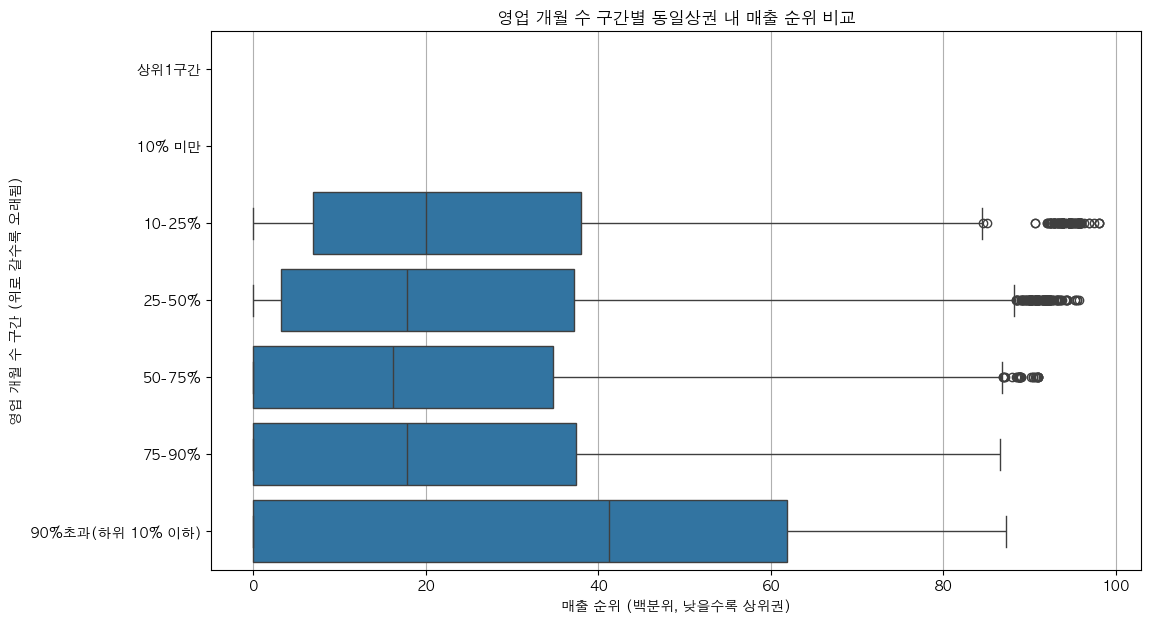

In [ ]:
# 영업 개월 수 구간 순서 지정
order = ['상위1구간', '10% 미만', '10-25%', '25-50%', '50-75%', '75-90%', '90%초과(하위 10% 이하)']

plt.figure(figsize=(12, 7))
sns.boxplot(x='12개월_동일상권_매출순위', y='영업개월수_구간정보_CAT', data=set2, order=order, orient='h')

plt.title('영업 개월 수 구간별 동일상권 내 매출 순위 비교')
plt.xlabel('매출 순위 (백분위, 낮을수록 상위권)')
plt.ylabel('영업 개월 수 구간 (위로 갈수록 오래됨)')
plt.grid(True, axis='x')
plt.show()


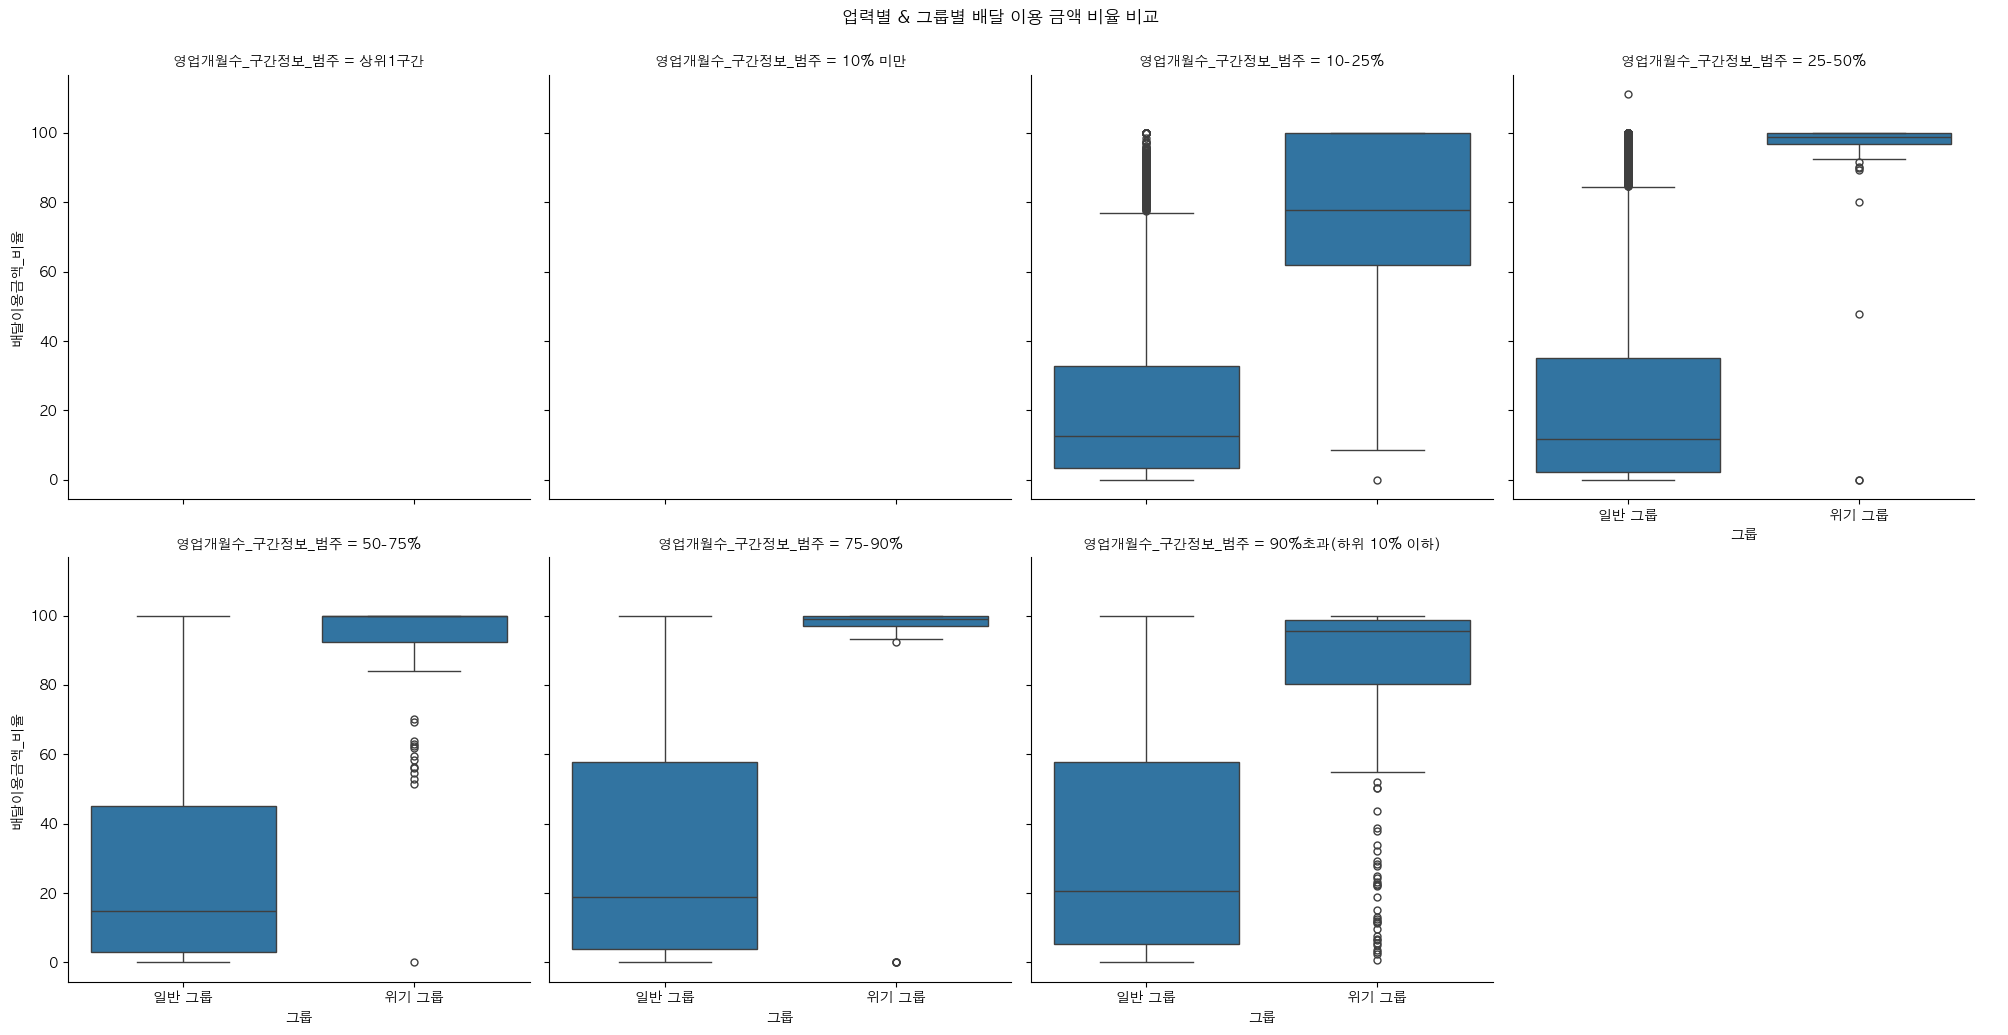

In [24]:
# 영업 개월 수 구간 순서 지정
age_order = ['상위1구간', '10% 미만', '10-25%', '25-50%', '50-75%', '75-90%', '90%초과(하위 10% 이하)']

# catplot으로 업력별 & 그룹별 배달 비율 비교
g = sns.catplot(
    data=set2,
    x='그룹',
    y='배달이용금액_비율',
    col='영업개월수_구간정보_범주', # 업력별로 그래프를 나눔
    col_wrap=4, # 한 줄에 4개씩 그래프를 그림
    kind='box',
    col_order=age_order
)
g.fig.suptitle('업력별 & 그룹별 배달 이용 금액 비율 비교', y=1.03)
plt.show()